# Replication and Data Analysis - Python

**Paper: "WHAT’S ADVERTISING CONTENT WORTH? EVIDENCE FROM A CONSUMER CREDIT MARKETING FIELD EXPERIMENT" (2010)**

Members: Valeria Hoyos, Alvaro Yllu and Pamela Cubas

In [ ]:
# Import relevant packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install econml

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 31.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from econml.dml import CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression, Ridge, Lasso, LogisticRegressionCV

In [ ]:
df = pd.read_csv('adcontentworth_qje.csv')

df['high_risk'] = df['risk'].apply(lambda x: 1 if x == "HIGH" else 0)
df['medium_risk'] = df['risk'].apply(lambda x: 1 if x == "MEDIUM" else 0)
df['race'] = df['race'].apply(lambda x: "black" if x == np.nan else x)
df['black_dummy'] = df['race'].apply(lambda x: 1 if x == "black" else 0)
df.fillna(0, inplace=True)
T = 'high_risk'
Y = 'applied'
X = df.drop(columns=['wave','dormancy','risk','tookup','tookup_after_short','applied_2weeks','tookup_after_med' ,'tookup_after_long','stripany','comp_n','tookup_outside_only','trcount','applied','high_risk','badacct_last','waved3','offer4','race']).columns

df.fillna(0, inplace=True)

In [ ]:
df

,wave,dormancy,race,risk,offer4,prize,intshown,trcount,tookup,applied,...,deadlineshortext,tookup_after_short,applied_2weeks,tookup_after_med,tookup_after_long,stripany,comp_n,high_risk,medium_risk,black_dummy
0,2,20,black,HIGH,9.69,1.0,1.0,16.0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,2,16,black,HIGH,3.25,0.0,0.0,5.0,0,0,...,0,0,0,0,0,1,1,1,0,1
2,2,10,black,HIGH,4.44,0.0,1.0,17.0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,2,18,black,HIGH,9.00,0.0,1.0,14.0,0,0,...,0,0,0,0,0,1,1,1,0,1
4,2,13,black,HIGH,9.75,1.0,0.0,14.0,0,0,...,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58163,3,1,black,HIGH,9.99,0.0,1.0,1.0,0,0,...,0,1,0,1,1,1,1,1,0,1
58164,3,1,black,HIGH,10.25,1.0,1.0,1.0,1,1,...,0,0,1,0,0,0,1,1,0,1
58165,3,1,black,HIGH,7.77,0.0,1.0,1.0,1,1,...,0,0,1,0,0,0,1,1,0,1
58166,3,1,black,HIGH,5.55,0.0,1.0,1.0,0,0,...,0,1,0,1,1,1,1,1,0,1


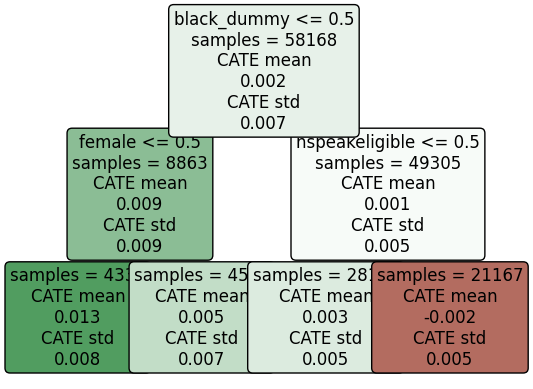

In [ ]:
from econml.dml import CausalForestDML
np.random.seed(0)
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=3)
tree_model = tree_model.fit(Y=df[Y], X=df[X], T=df[T])

from econml.cate_interpreter import SingleTreeCateInterpreter
%matplotlib inline

intrp = SingleTreeCateInterpreter(max_depth=2).interpret(tree_model, df[X])
intrp.plot(feature_names=X, fontsize=10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

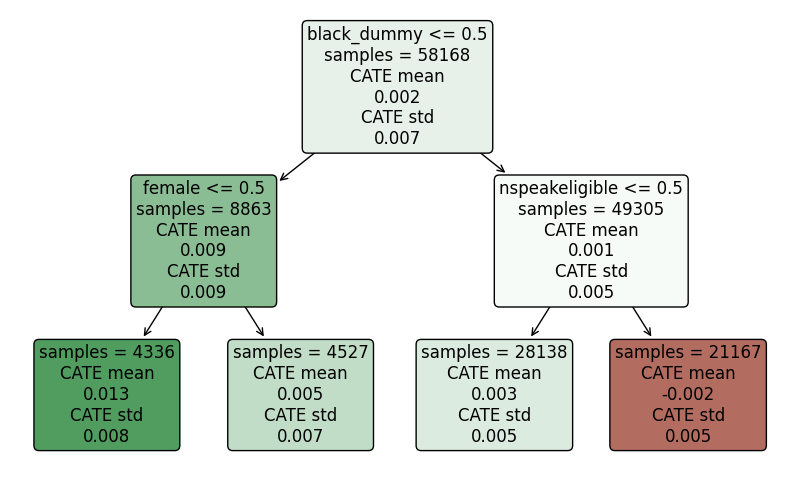

In [ ]:
from econml.dml import CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter
import matplotlib.pyplot as plt
import numpy as np

# Establecer la semilla aleatoria para reproducibilidad
np.random.seed(0)

# Crear y ajustar el modelo de Causal Forest DML
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=3)
tree_model = tree_model.fit(Y=df[Y], X=df[X], T=df[T])

# Interpretar el modelo con SingleTreeCateInterpreter
intrp = SingleTreeCateInterpreter(max_depth=2)
intrp.interpret(tree_model, df[X])

# Configurar la figura y el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar la interpretación del árbol
intrp.plot(feature_names=X, fontsize=12)

# Guardar el gráfico como archivo JPG
plt.savefig('interprete_arbol.jpg')

# Mostrar el gráfico en la salida
plt.show()
